# Continuous prediction with regression



## Background

+ Recall, we discussed a strict threshold classifier with accuracy as the loss function. 
+ Now consider continuous prediction, we need a loss function. 
+ A reasonable strategy would be to minimize the average squared distances between our predictions and the observed values, called the mean squared error MSE

$$\frac{1}{n}\sum_{i=1}^n (Y_i - \hat \mu_i)^2.$$


## Regression line

+ How to come up with $\hat \mu_i$, our predictions for the observation $Y_i$?. 
+ We previously considered just a rescaled version of $X$, our predictor, using regression through the origin. 
+ Consider a slightly more complex model that includes a location (intercept) shift and a scale factor (slope)
+ To tie ourselves down with an example, consider the previous lecture's example, consider trying to get the FLAIR value from the other, non-FLAIR, imaging values. 


In [14]:
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## this sets some style parameters
sns.set()

## Read in the data and display a few rows
dat = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv")
dat.head(4)

,FLAIR,PD,T1,T2,FLAIR_10,PD_10,T1_10,T2_10,FLAIR_20,PD_20,T1_20,T2_20,GOLD_Lesions
0,1.143692,1.586219,-0.799859,1.634467,0.437568,0.823800,-0.002059,0.573663,0.279832,0.548341,0.219136,0.298662,0
1,1.652552,1.766672,-1.250992,0.921230,0.663037,0.880250,-0.422060,0.542597,0.422182,0.549711,0.061573,0.280972,0
2,1.036099,0.262042,-0.858565,-0.058211,-0.044280,-0.308569,0.014766,-0.256075,-0.136532,-0.350905,0.020673,-0.259914,0
3,1.037692,0.011104,-1.228796,-0.470222,-0.013971,-0.000498,-0.395575,-0.221900,0.000807,-0.003085,-0.193249,-0.139284,0


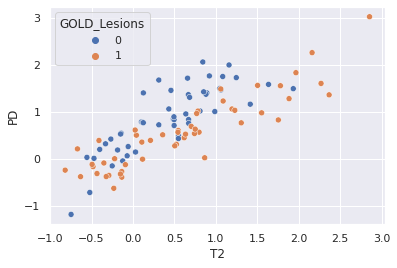

In [15]:
sns.scatterplot(data = dat, x = 'T2', y = 'PD', hue = 'GOLD_Lesions');

# Regression lines

+ Let's try to predict their PD values from the T2 values using a line.
+ Consider the loss function

$$
\sum_{v=1}^V (PD_v - \beta_0 - \beta_1 T2_v)^2
$$


+ A general equation for fitting a line to data is

$$
\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)^2
$$


pointing out that the fitted line has to go through the point $(\bar X, \bar Y)$. 


## Some definitions

* The **covariance** is defined as  $Cov(X,Y) = \sum_{i=1}^n (Y_i - \bar Y) (X_i - \bar X) / (N-1)$
* The **standard deviation** of $X$ is $SD_X$, $\sqrt{Cov(X, X)}$
* The Pearson **correlation** is defined as $\frac{Cov(X, Y)}{SD_X \times SD_Y}$

## General solution

+ It turns out that $\beta_0$ and $\beta_1$ have optimal solutions that we can write down. We get

$$
\hat \beta_1 = Cor(X, Y) \frac{SD_Y}{SD_X}
$$

+ where $Cor(X, Y)$ is the (Pearson) **correlation** between $X$ and $Y$ and $SD_X$ is the **standard deviation** of $X$ (and $SD_Y$ is for $Y$). 


## The intercept

$$
\hat \beta_0 = \bar Y - \bar X \hat \beta_1
$$

+ where $\bar X$ and $\bar Y$ are the means. 
+ Notice this latter equation reorganized is just

$$
\bar Y = \hat \beta_0 + \bar X \hat \beta_1
$$

## Trying it out on the data

In [16]:
x = dat['T2']
y = dat['PD']
trainFraction = 0.75

## Hold out data
sample = np.random.uniform(size = 100) < trainFraction
xtrain = x[ sample]
ytrain = y[ sample]
xtest =  x[~sample]
ytest =  y[~sample]

## get the slope on the training data
beta1 = st.pearsonr(xtrain, ytrain)[0] * np.std(ytrain) / np.std(xtrain)
beta0 = np.mean(ytrain) - np.mean(xtrain) * beta1
print([beta0, beta1])

[0.26987091224521814, 0.7999718537518254]


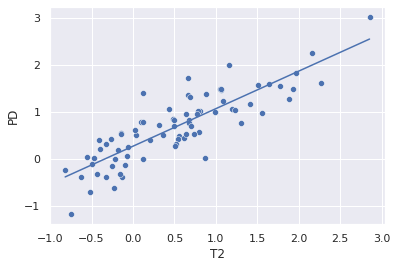

In [17]:
sns.scatterplot(x = xtrain, y = ytrain);
sns.lineplot(x = xtrain, y = beta0 + beta1 * xtrain);

LinregressResult(slope=0.7999718537518254, intercept=0.26987091224521814, rvalue=0.8510501244323598, pvalue=1.1170482646882306e-22, stderr=0.05699255115568582, intercept_stderr=0.05343521770511724)


/home/jupyter-bcaffo/.conda/envs/ds4bio/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


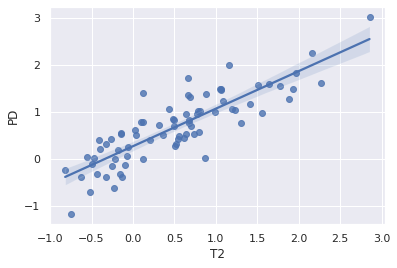

In [18]:
print(st.linregress(x = xtrain, y = ytrain))
sns.regplot(xtrain, ytrain);

# Predictions

[0.148423431482471, 0.310734416992071]


/home/jupyter-bcaffo/.conda/envs/ds4bio/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


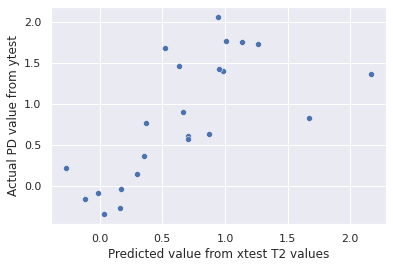

In [19]:
yhat_test = beta0 + beta1 * xtest
yhat_train = beta0 + beta1 * xtrain

## claculate the MSE in the training and test sets
print([ np.mean( (ytrain - yhat_train) ** 2), 
        np.mean( (ytest -  yhat_test) ** 2 ) ])


sns.scatterplot(yhat_test, ytest);
plt.xlabel('Predicted value from xtest T2 values');
plt.ylabel('Actual PD value from ytest');


